# Testing CoNLL-U datasets

In this file we are testing how much the behaviour of a model changes depending of the preprocessing done to our data, including:

- Removing stopwords
- Removing punctuation
- Removing rows that can be considered useless
- Etc

For all test we will use, for now, the same type of model, same split of values, and same hyperparameters.

In [1]:
import sys
import os
import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import numpy as np

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, '..', '..'))
sys.path.append(parent_dir)

from utils import extract_original_text, extract_preprocessed_text, load_conllu_data


/Users/saito/Documents/GitHub/NLP-DetecConstComm-project/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
output_folder = './../output'

classes_file = 'classes.txt'
preprocessed_file = 'preprocessed_dataset.conllu'

seed = 1234

stop_words = stopwords.words('english')
punctuation = list(string.punctuation)

In [3]:
def run_nn(X_train, y_train, X_test, y_test):
    #4 Training the Naive Bayes classifier
    nn_model = Sequential([
        Dense(128, activation='relu', input_dim=X_train.shape[1]), # Input layer
        Dropout(0.2),  # Dropout to avoid overfitting
        Dense(64, activation='relu'),  # Intermediate layer
        Dropout(0.2),  # Dropout to avoid overfitting
        Dense(32, activation='relu'),  # Intermediate layer
        Dense(1, activation='sigmoid')  # Output layer (binary classification)
    ])

    nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'precision', 'recall'])

    nn_model.fit(X_train, y_train, epochs=10, batch_size=32)

    loss, accuracy, precision, recall = nn_model.evaluate(X_test, y_test)

    f1_score = 2 * (precision * recall) / (precision + recall)

    print(f"Loss: {loss:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1_score:.4f}")

    predictions = (nn_model.predict(X_test) > 0.5).astype(int)

    # return predictions
    return predictions, nn_model

## Test - 1 

### Full preprocessing:
- Lemmatitation 
- Remmoving of unusable rows
- Removing of stopwords
- Removing of punctuation

In [4]:
vectorizer = TfidfVectorizer()
test_1_folder = '0_full_preprocessing'

# Load classes from file using pandas
class_1_df = pd.read_csv(
    f'{output_folder}/{test_1_folder}/{classes_file}', 
    sep='\t',
    header=None, 
    names=['doc_id', 'constructive'],
    skiprows=1
)

# Load preprocessed data 
conllu_data_1 = extract_preprocessed_text(f'{output_folder}/{test_1_folder}/{preprocessed_file}')


# Vectorize data
X_1 = vectorizer.fit_transform(conllu_data_1)
# Extract the classes
y_1 = class_1_df['constructive']

In [5]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=seed)

In [6]:
pred_test_1, nn_model_t1 = run_nn(X_train_1, y_train_1, X_test_1, y_test_1)

Epoch 1/10


/Users/saito/Documents/GitHub/NLP-DetecConstComm-project/venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7080 - loss: 0.5192 - precision: 0.6818 - recall: 0.9228
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9545 - loss: 0.1336 - precision: 0.9601 - recall: 0.9589
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9870 - loss: 0.0397 - precision: 0.9863 - recall: 0.9898
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9976 - loss: 0.0087 - precision: 0.9984 - recall: 0.9971
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9997 - loss: 0.0019 - precision: 0.9998 - recall: 0.9997
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 6.6191e-04 - precision: 1.0000 - recall: 1.0000
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9999 - loss: 7.3197e-04 - precision: 0.9999 - recall: 1.0000
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9999 - loss: 5.1608e-04 - precision: 0.9999 - recall: 0.9999
Epoch 9/10
300/

In [7]:
vectorizer = TfidfVectorizer()
test_2_folder = '1_keep_punctuation'

# Load classes from file using pandas
class_2_df = pd.read_csv(
    f'{output_folder}/{test_2_folder}/{classes_file}', 
    sep='\t',
    header=None, 
    names=['doc_id', 'constructive'],
    skiprows=1
)

# Load preprocessed data 
conllu_data_2 = extract_preprocessed_text(f'{output_folder}/{test_2_folder}/{preprocessed_file}')


# Vectorize data
X_2 = vectorizer.fit_transform(conllu_data_2)
# Extract the classes
y_2 = class_2_df['constructive']

In [8]:
vectorizer = TfidfVectorizer(max_features=2000)
test_2_folder = '1_keep_punctuation'

# Load classes from file using pandas
class_2_df = pd.read_csv(
    f'{output_folder}/{test_2_folder}/{classes_file}', 
    sep='\t',
    header=None, 
    names=['doc_id', 'constructive'],
    skiprows=1
)

# Load preprocessed data 
conllu_data_2 = extract_preprocessed_text(f'{output_folder}/{test_2_folder}/{preprocessed_file}')


# Vectorize data
X_2 = vectorizer.fit_transform(conllu_data_2)
# Extract the classes
y_2 = class_2_df['constructive']

In [9]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=seed)

In [10]:
pred_test_2,nn_model_t2 = run_nn(X_train_2, y_train_2, X_test_2, y_test_2)

Epoch 1/10


/Users/saito/Documents/GitHub/NLP-DetecConstComm-project/venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6769 - loss: 0.5293 - precision: 0.6514 - recall: 0.9095
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9240 - loss: 0.1965 - precision: 0.9358 - recall: 0.9260
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9638 - loss: 0.1072 - precision: 0.9705 - recall: 0.9629
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9846 - loss: 0.0508 - precision: 0.9894 - recall: 0.9824
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9960 - loss: 0.0171 - precision: 0.9962 - recall: 0.9965
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9989 - loss: 0.0071 - precision: 0.9994 - recall: 0.9985
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9990 - loss: 0.0041 - precision: 0.9990 - recall: 0.9992
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9996 - loss: 0.0037 - precision: 0.9995 - recall: 0.9998
Epoch 9/10
300/300 ━━━━━━━━

In [11]:
vectorizer = TfidfVectorizer()
test_3_folder = '2_keep_stopwords'

# Load classes from file using pandas
class_3_df = pd.read_csv(
    f'{output_folder}/{test_3_folder}/{classes_file}', 
    sep='\t',
    header=None, 
    names=['doc_id', 'constructive'],
    skiprows=1
)

# Load preprocessed data 
conllu_data_3 = extract_preprocessed_text(f'{output_folder}/{test_3_folder}/{preprocessed_file}')


# Vectorize data
X_3 = vectorizer.fit_transform(conllu_data_3)
# Extract the classes
y_3 = class_3_df['constructive']

In [12]:
vectorizer = TfidfVectorizer(max_features=2000)
test_3_folder = '2_keep_stopwords'

# Load classes from file using pandas
class_3_df = pd.read_csv(
    f'{output_folder}/{test_3_folder}/{classes_file}', 
    sep='\t',
    header=None, 
    names=['doc_id', 'constructive'],
    skiprows=1
)

# Load preprocessed data 
conllu_data_3 = extract_preprocessed_text(f'{output_folder}/{test_3_folder}/{preprocessed_file}')


# Vectorize data
X_3 = vectorizer.fit_transform(conllu_data_3)
# Extract the classes
y_3 = class_3_df['constructive']

In [13]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.2, random_state=seed)

In [14]:
pred_test_3,nn_model_t3 = run_nn(X_train_3, y_train_3, X_test_3, y_test_3)

Epoch 1/10


/Users/saito/Documents/GitHub/NLP-DetecConstComm-project/venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7227 - loss: 0.4884 - precision: 0.6900 - recall: 0.9384
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9335 - loss: 0.1784 - precision: 0.9414 - recall: 0.9361
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9667 - loss: 0.1033 - precision: 0.9707 - recall: 0.9685
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9863 - loss: 0.0493 - precision: 0.9890 - recall: 0.9858
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9946 - loss: 0.0239 - precision: 0.9953 - recall: 0.9948
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9967 - loss: 0.0137 - precision: 0.9974 - recall: 0.9966
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9982 - loss: 0.0061 - precision: 0.9980 - recall: 0.9986
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9982 - loss: 0.0070 - precision: 0.9982 - recall: 0.9986
Epoch 9/10
300/300 ━━━━━━━━

In [15]:
vectorizer = TfidfVectorizer()
test_4_folder = '3_keep_punctuation_stopwords'

# Load classes from file using pandas
class_4_df = pd.read_csv(
    f'{output_folder}/{test_4_folder}/{classes_file}', 
    sep='\t',
    header=None, 
    names=['doc_id', 'constructive'],
    skiprows=1
)

# Load preprocessed data 
conllu_data_4 = extract_preprocessed_text(f'{output_folder}/{test_4_folder}/{preprocessed_file}')


# Vectorize data
X_4 = vectorizer.fit_transform(conllu_data_4)
# Extract the classes
y_4 = class_4_df['constructive']

In [16]:
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, test_size=0.2, random_state=seed)

In [17]:
pred_test_4,nn_model_t4 = run_nn(X_train_4, y_train_4, X_test_4, y_test_4)

Epoch 1/10


/Users/saito/Documents/GitHub/NLP-DetecConstComm-project/venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7185 - loss: 0.4985 - precision: 0.6937 - recall: 0.9167
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9550 - loss: 0.1260 - precision: 0.9601 - recall: 0.9567
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9866 - loss: 0.0435 - precision: 0.9921 - recall: 0.9830
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9979 - loss: 0.0082 - precision: 0.9985 - recall: 0.9977
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9994 - loss: 0.0029 - precision: 0.9991 - recall: 0.9998
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9999 - loss: 0.0012 - precision: 0.9998 - recall: 1.0000
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 5.2807e-04 - precision: 1.0000 - recall: 1.0000
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 2.7196e-04 - precision: 1.0000 - recall: 0.9999
Epoch 9/10
300/300 

In [18]:
text_1_df = pd.DataFrame(conllu_data_1, columns=['text_1'])
text_2_df = pd.DataFrame(conllu_data_2, columns=['text_2'])
text_3_df = pd.DataFrame(conllu_data_3, columns=['text_3'])
text_4_df = pd.DataFrame(conllu_data_4, columns=['text_4'])

test_df = pd.DataFrame(y_test_1)

# Merge the dataframes by their index
combined_results = pd.concat([text_1_df, text_2_df, text_3_df, text_4_df, test_df], axis=1, join='inner')
combined_results

,text_1,text_2,text_3,text_4,constructive
1,i commend harper hold debate outside left - wi...,i commend harper hold debate outside left - wi...,i commend harper for hold the debate outside o...,i commend harper for hold the debate outside o...,1
2,what joke rachel notley be . this post ndp web...,what joke rachel notley be . this post ndp web...,what a joke rachel notley be . this be what be...,what a joke rachel notley be . this be what be...,1
5,what absurd opinion piece ! identity politics ...,what absurd opinion piece ! identity politics ...,what a absurd opinion piece ! identity politic...,what a absurd opinion piece ! identity politic...,1
6,in usa states senate . i believe ontario get b...,in usa states senate . i believe ontario get b...,in the usa most state have a senate . i believ...,in the usa most state have a senate . i believ...,1
8,"==============================' ben carr , win...","==============================' ben carr , win...","==============================' ben carr , a w...","==============================' ben carr , a w...",1
...,...,...,...,...,...
11973,jeff rubin david suzuki . can anyone name two ...,jeff rubin david suzuki . can anyone name two ...,jeff rubin and david suzuki . can anyone name ...,jeff rubin and david suzuki . can anyone name ...,0
11974,blm illustrate lack credibility repeat vicious...,blm illustrate lack credibility repeat vicious...,blm illustrate their lack of credibility by re...,blm illustrate their lack of credibility by re...,0
11980,"i even finish article , i skim jump see local ...","i even finish article , i skim jump see local ...","i do not even finish the article , i just skim...","i do not even finish the article , i just skim...",0
11981,some we prefer life run vote committee .,some we prefer life run vote committee .,some of we prefer not to have our life run by ...,some of we prefer not to have our life run by ...,0


In [19]:
combined_results['test_1'] = pred_test_1
combined_results['test_2'] = pred_test_2
combined_results['test_3'] = pred_test_3
combined_results['test_4'] = pred_test_4

combined_results.shape # 2398 rows

combined_results.sort_index()

# Save test results
combined_results.to_csv(f'{output_folder}/tests_results.csv', index=False)

In [20]:
# Get the number of rows where all test results are the same
all_equal = combined_results[
    (combined_results['test_1'] == combined_results['test_2']) &
    (combined_results['test_1'] == combined_results['test_3']) & 
    (combined_results['test_1'] == combined_results['test_4'])
]

# Get the number of rows where all test results are not the same
all_different = combined_results[
    (combined_results['test_1'] != combined_results['test_2']) |
    (combined_results['test_1'] != combined_results['test_3']) | 
    (combined_results['test_1'] != combined_results['test_4'])
]

all_correct_test_1 = all_equal[all_equal['constructive'] == all_equal['test_1']]
all_correct_test_2 = all_equal[all_equal['constructive'] == all_equal['test_2']]
all_correct_test_3 = all_equal[all_equal['constructive'] == all_equal['test_3']]
all_correct_test_4 = all_equal[all_equal['constructive'] == all_equal['test_4']]

all_wrong_test_1 = all_equal[all_equal['constructive'] != all_equal['test_1']]
all_wrong_test_2 = all_equal[all_equal['constructive'] != all_equal['test_2']]
all_wrong_test_3 = all_equal[all_equal['constructive'] != all_equal['test_3']]
all_wrong_test_4 = all_equal[all_equal['constructive'] != all_equal['test_4']]

all_wrong = combined_results[
    (combined_results['constructive'] != combined_results['test_2']) &
    (combined_results['constructive'] != combined_results['test_3']) & 
    (combined_results['constructive'] != combined_results['test_4']) &
    (combined_results['constructive'] != combined_results['test_1'])
]

all_correct = combined_results[
    (combined_results['constructive'] == combined_results['test_2']) &
    (combined_results['constructive'] == combined_results['test_3']) & 
    (combined_results['constructive'] == combined_results['test_4']) &
    (combined_results['constructive'] == combined_results['test_1'])
]

In [21]:
def get_most_common_words(data, n=10, normalize=False, avg=False):
    new_stop_words = stop_words.copy()
    new_stop_words.remove('but')
    new_stop_words.remove('if')
    new_stop_words.remove('until')
    new_stop_words.remove('than')
    new_stop_words.remove("shouldn")
    new_stop_words.remove("shouldn't")

    joined_text = data.str.cat(sep=' ')
    # Remove punctuation
    joined_text = joined_text.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    joined_text = ' '.join([word for word in joined_text.split() if word.lower() not in new_stop_words])
    # Count the frequency of each word
    joined_text = joined_text.split()
    joined_text = pd.Series(joined_text)

    if normalize:
        joined_text = joined_text.value_counts(normalize=True)
    elif avg:
        joined_text = joined_text.value_counts(normalize=True) / len(data)
    else:
        joined_text = joined_text.value_counts()

    return  joined_text.head(n)

def plot_most_common_words(constructive_data, non_constructive_data, title_1="Constructive", title_2="Non-Constructive"):
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    sns.barplot(x=constructive_data.values, y=constructive_data.index, ax=ax[0])
    ax[0].set_title(title_1)
    ax[0].set_xlabel('Frequency')
    ax[0].set_ylabel('Words')

    sns.barplot(x=non_constructive_data.values, y=non_constructive_data.index, ax=ax[1])
    ax[1].set_title(title_2)
    ax[1].set_xlabel('Frequency')
    ax[1].set_ylabel('Words')

    plt.tight_layout()
    plt.show()

In [22]:
# Get the most frequent words from all correct predictions with label 0 (non-constructive) and 1 (constructive)
non_constructive = all_correct[all_correct['constructive'] == 0]
constructive = all_correct[all_correct['constructive'] == 1]

582
407


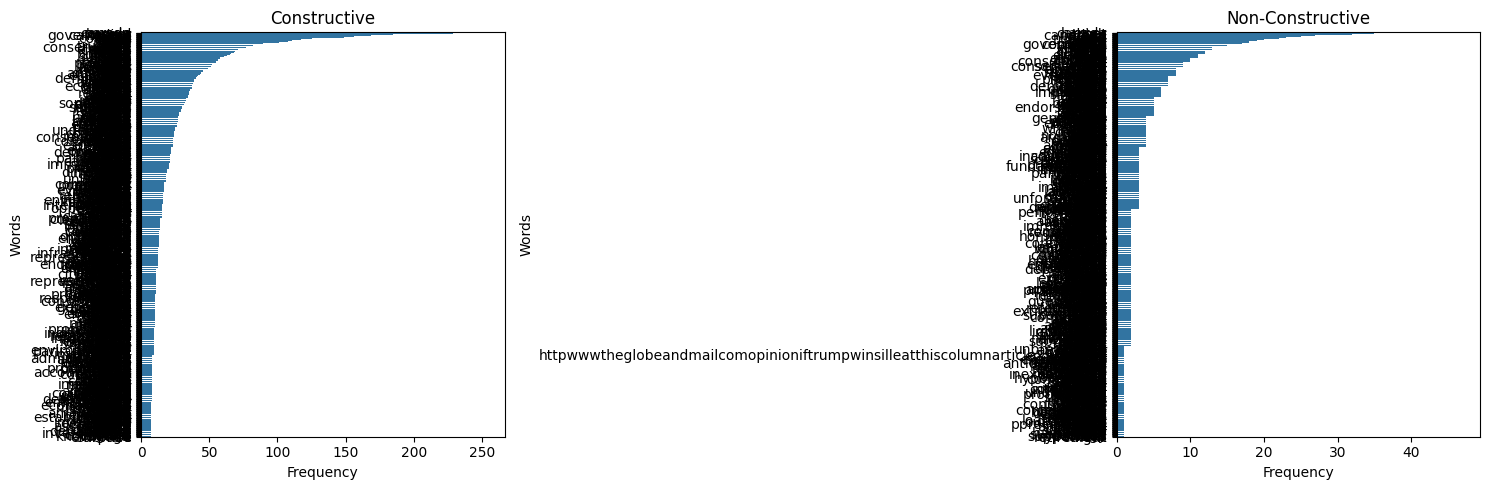

Top constructive words that are not in non-constructive:
Index(['yet', 'value', 'nation', 'economic', 'child', 'home', 'start', 'force',
       'increase', 'control',
       ...
       '2011', 'investigation', 'fringe', 'voice', 'regime', 'eastern',
       'commons', 'knowledge', 'fit', 'embrace'],
      dtype='object', length=427)
Top non-constructive words that are not in constructive:
Index(['apply', 'hour', 'jeffrey', 'month', 'pronoun', 'nanny', 'rob', 'gee',
       'sorry', 'fool',
       ...
       'neocon', 'repeat', 'submission', 'ideology', 'vicious', 'shoot',
       'hyperbole', 'supposition', 'vulgar', 'retirement'],
      dtype='object', length=427)


In [30]:
# All correct constructive test 1
all_correct_constructive_t1 = constructive["text_1"]
all_correct_non_constructive_t1 = non_constructive["text_1"]

print(len(all_correct_constructive_t1))
print(len(all_correct_non_constructive_t1))

common_constructive_words_t1 = (get_most_common_words(all_correct_constructive_t1, 1000))
common_non_constructive_words_t1 = (get_most_common_words(all_correct_non_constructive_t1, 1000))

plot_most_common_words(common_constructive_words_t1, common_non_constructive_words_t1)

# Constructive words that are not in non-constructive
constructive_words_t1 = common_constructive_words_t1.index
non_constructive_words_t1 = common_non_constructive_words_t1.index

top_only_constructive_t1 = constructive_words_t1[~constructive_words_t1.isin(non_constructive_words_t1)]
top_only_non_constructive_t1 = non_constructive_words_t1[~non_constructive_words_t1.isin(constructive_words_t1)]

print("Top constructive words that are not in non-constructive:")
print(top_only_constructive_t1)

print("Top non-constructive words that are not in constructive:")
print(top_only_non_constructive_t1)


In [32]:
print(top_only_non_constructive_t1)

Index(['apply', 'hour', 'jeffrey', 'month', 'pronoun', 'nanny', 'rob', 'gee',
       'sorry', 'fool',
       ...
       'neocon', 'repeat', 'submission', 'ideology', 'vicious', 'shoot',
       'hyperbole', 'supposition', 'vulgar', 'retirement'],
      dtype='object', length=427)


In [41]:
# Get the frequency of top_only_non_constructive_t1 words in all_correct_non_constructive_t1

top_only_non_constructive_t1_freq = pd.Series({word: all_correct_non_constructive_t1.str.cat(sep=' ').count(word) for word in top_only_non_constructive_t1}).sort_values(ascending=False)
top_only_constructive_t1_freq = pd.Series({word: all_correct_constructive_t1.str.cat(sep=' ').count(word) for word in top_only_constructive_t1}).sort_values(ascending=False)

top_only_non_constructive_t1_freq

c                 1214
al                 315
id                  79
au                  49
pre                 37
                  ... 
neocon               0
antidemocratic       0
spoton               0
antiwente            0
oleary               0
Length: 427, dtype: int64

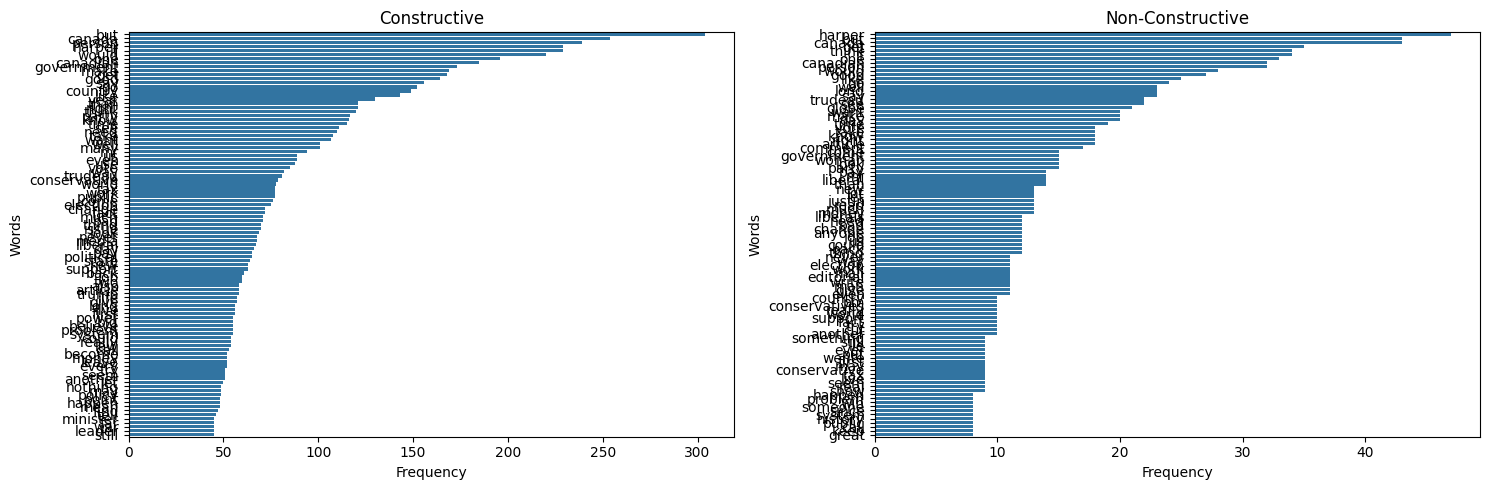

Top constructive words that are not in non-constructive:
Index(['year', 'many', 'use', 'issue', 'media', 'political', 'state', 'two',
       'also', 'trump', 'life', 'power', 'big', 'believe', 'law', 'become',
       'leave', 'every', 'nothing', 'policy', 'point', 'mean', 'find', 'tell',
       'minister', 'far', 'war', 'leader'],
      dtype='object')
Top non-constructive words that are not in constructive:
Index(['globe', 'comment', 'woman', 'lot', 'justin', 'read', 'liberals',
       'anyone', 'mail', 'editorial', 'write', 'man', 'pm', 'conservatives',
       'cut', 'something', 'lie', 'ever', 'put', 'wente', 'real', 'show',
       'win', 'someone', 'since', 'history', 'keep', 'great'],
      dtype='object')


In [53]:
# All correct constructive test 1
all_correct_constructive_t4 = constructive["text_4"]
all_correct_non_constructive_t4 = non_constructive["text_4"]

common_constructive_words_t4 = (get_most_common_words(all_correct_constructive_t4, 100))
common_non_constructive_words_t4 = (get_most_common_words(all_correct_non_constructive_t4, 100))

plot_most_common_words(common_constructive_words_t4, common_non_constructive_words_t4)

# Constructive words that are not in non-constructive
constructive_words_t4 = common_constructive_words_t4.index
non_constructive_words_t4 = common_non_constructive_words_t4.index

top_only_constructive_t4 = constructive_words_t4[~constructive_words_t4.isin(non_constructive_words_t4)]
top_only_non_constructive_t4 = non_constructive_words_t4[~non_constructive_words_t4.isin(constructive_words_t4)]

print("Top constructive words that are not in non-constructive:")
print(top_only_constructive_t4)

print("Top non-constructive words that are not in constructive:")
print(top_only_non_constructive_t4)

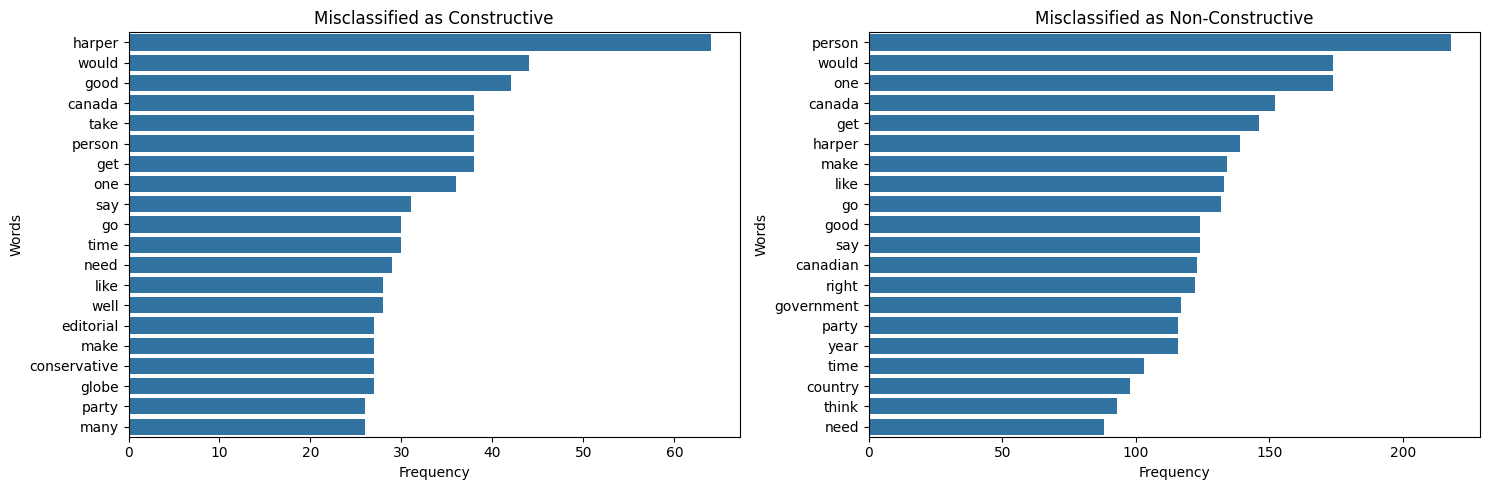

Top unique misclassified as constructive:
Index(['take', 'well', 'editorial', 'conservative', 'globe', 'many'], dtype='object')
Top unique misclassified as non-constructive:
Index(['canadian', 'right', 'government', 'year', 'country', 'think'], dtype='object')


In [25]:
non_constructive_wrong = all_wrong[all_wrong['constructive'] == 0]
constructive_wrong = all_wrong[all_wrong['constructive'] == 1]

fp_constructive_t1 = non_constructive_wrong["text_1"]
fn_non_constructive_t1 = constructive_wrong["text_1"]

fp_constructive_words_t1 = get_most_common_words(fp_constructive_t1, 20)
fn_non_contructive_words_t1 = get_most_common_words(fn_non_constructive_t1, 20)

plot_most_common_words(fp_constructive_words_t1, fn_non_contructive_words_t1, title_1="Misclassified as Constructive", title_2="Misclassified as Non-Constructive")

# Top misclassified words that are not shared

fp_constructive_words_t1 = fp_constructive_words_t1.index
fn_non_contructive_words_t1 = fn_non_contructive_words_t1.index

top_only_fp_constructive_t1 = fp_constructive_words_t1[~fp_constructive_words_t1.isin(fn_non_contructive_words_t1)]
top_only_fn_non_constructive_t1 = fn_non_contructive_words_t1[~fn_non_contructive_words_t1.isin(fp_constructive_words_t1)]

print("Top unique misclassified as constructive:")
print(top_only_fp_constructive_t1)

print("Top unique misclassified as non-constructive:")
print(top_only_fn_non_constructive_t1)


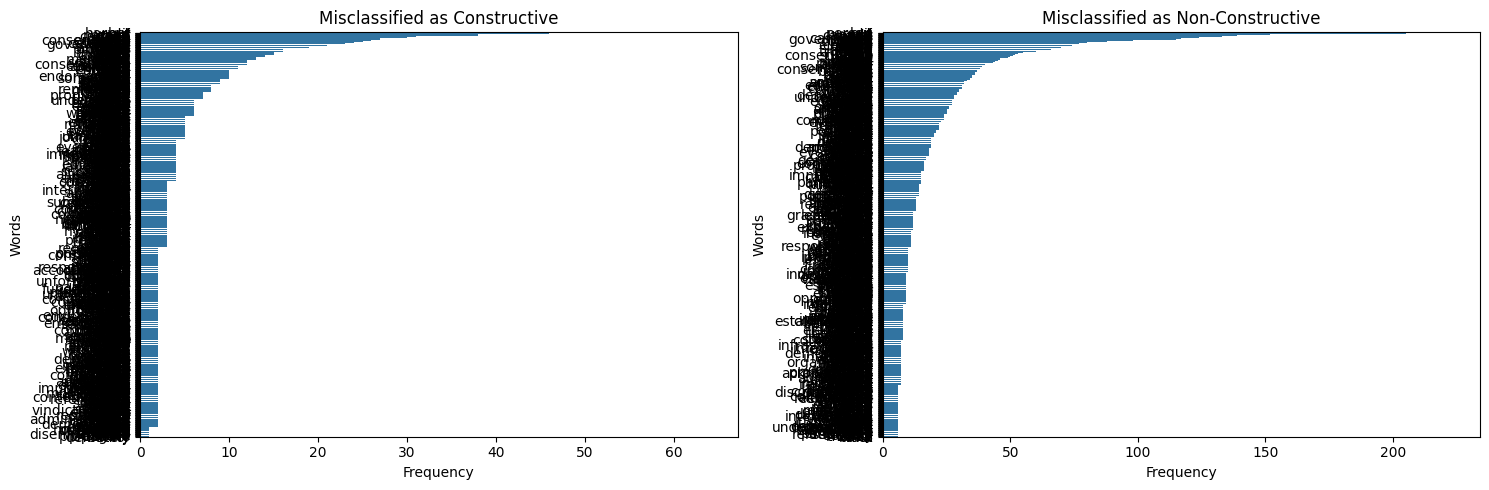

Top unique misclassified as constructive:
Index(['endorsement', 'gun', 'ok', 'southey', 'stupid', 'video', 'promise',
       'nanny', 'dumb', 'smoke',
       ...
       'spoof', '20s', 'parole', 'disenfranchise', 'contain', 'hello', 'block',
       'propagate', 'precisely', 'definitely'],
      dtype='object', length=389)
Top unique misclassified as non-constructive:
Index(['debate', 'less', 'income', 'family', 'result', 'current', 'community',
       'create', 'energy', 'health',
       ...
       '20', 'engage', 'personally', 'employee', 'relationship', 'section',
       'saudi', '2011', 'bank', 'vast'],
      dtype='object', length=389)


In [44]:
fp_constructive_t4 = non_constructive_wrong["text_4"]
fn_non_constructive_t4 = constructive_wrong["text_4"]

fp_constructive_words_t4 = get_most_common_words(fp_constructive_t4, 1000)
fn_non_contructive_words_t4 = get_most_common_words(fn_non_constructive_t4, 1000)

plot_most_common_words(fp_constructive_words_t4, fn_non_contructive_words_t4, title_1="Misclassified as Constructive", title_2="Misclassified as Non-Constructive")

# Top misclassified words that are not shared

fp_constructive_words_t4 = fp_constructive_words_t4.index
fn_non_contructive_words_t4 = fn_non_contructive_words_t4.index

top_only_fp_constructive_t4 = fp_constructive_words_t4[~fp_constructive_words_t4.isin(fn_non_contructive_words_t4)]
top_only_fn_non_constructive_t4 = fn_non_contructive_words_t4[~fn_non_contructive_words_t4.isin(fp_constructive_words_t4)]

print("Top unique misclassified as constructive:")
print(top_only_fp_constructive_t4)

print("Top unique misclassified as non-constructive:")
print(top_only_fn_non_constructive_t4)

In [27]:
# Missclassified as non-constructive
non_constructive_wrong["text_4"]
# Save in a file
non_constructive_wrong.to_csv(f'{output_folder}/missclassified_non_constructive.csv', index=False)

In [28]:
# Missclassified as constructive
# Save in a file constructive_wrong["text_4"]
constructive_wrong.to_csv(f'{output_folder}/misclassified_constructive.csv', index=False)


In [ ]:
# Get the frequency of top_only_non_constructive_t1 words in all_correct_non_constructive_t1

top_only_non_constructive_t1_freq = pd.Series({word: all_correct_non_constructive_t1.str.cat(sep=' ').count(word) for word in top_only_non_constructive_t1}).sort_values(ascending=False)
top_only_constructive_t1_freq = pd.Series({word: all_correct_constructive_t1.str.cat(sep=' ').count(word) for word in top_only_constructive_t1}).sort_values(ascending=False)

top_only_non_constructive_t1_freq

In [68]:
# Get the frequency of top_only_non_constructive_t1 words in all_correct_non_constructive_t1

top_only_non_constructive_t4_freq = pd.Series({word: all_correct_non_constructive_t4.str.cat(sep=' ').count(word) for word in top_only_non_constructive_t4}).sort_values(ascending=False)
top_only_constructive_t4_freq = pd.Series({word: all_correct_constructive_t4.str.cat(sep=' ').count(word) for word in top_only_constructive_t4}).sort_values(ascending=False)

# Save the words to CSV files
# top_only_non_constructive_t4_freq.index.to_series().to_csv(f'{output_folder}/top_only_non_constructive_t4_words.csv', index=False, header=False)
# top_only_constructive_t4_freq.index.to_series().to_csv(f'{output_folder}/top_only_constructive_t4_words.csv', index=False, header=False)


use                use
year              year
war                war
many              many
every            every
state            state
political    political
media            media
point            point
issue            issue
law                law
two                two
life              life
mean              mean
leader          leader
big                big
tell              tell
trump            trump
power            power
also              also
far                far
believe        believe
leave            leave
become          become
minister      minister
policy          policy
nothing        nothing
find              find
dtype: object

In [72]:
# Explort top_only_non_constructive_t4_freq as txt
top_only_non_constructive_t4_freq.index.to_series().to_csv(f'{output_folder}/vocabulary_non_constructive.csv', sep='\t', header=False, index=False)
top_only_constructive_t4_freq.index.to_series().to_csv(f'{output_folder}/vocabulary_constructive.csv', sep='\t', header=False, index=False)